In [66]:
from torchvision import transforms
import torchvision as tv
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor()])
trainset = tv.datasets.MNIST(root='data/', train=True, download=True, transform=transform)
testset = tv.datasets.MNIST(root='data/', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, shuffle=True, batch_size=32)
testloader = DataLoader(testset, shuffle=False)

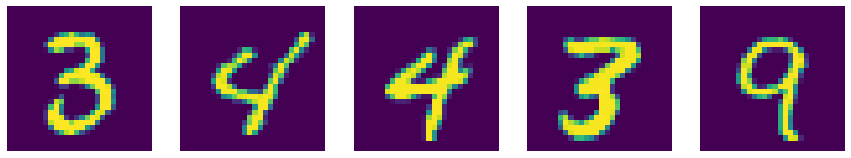

In [28]:
from matplotlib import pyplot as plt
import numpy as np
data = iter(trainloader)
plt.figure(figsize=(15, 5))
for i in range(5):
    images, label = next(data)
    plt.subplot(1, 5, i+1)
    plt.imshow(images[0][0])
    plt.axis('off')
plt.show()

In [49]:
# 20x20

In [52]:
import torch as tc
from torch import nn
from torch.nn import functional as F


class AutoEncoder1(nn.Module):
    def __init__(self):
        super(AutoEncoder1, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 4, 5)
        self.conv_transpose1 = nn.ConvTranspose2d(4, 8, 5)
        self.conv_transpose2 = nn.ConvTranspose2d(8, 1, 5)
    
    def forward(self, x):
        x = self.encode(x)
        return self.decode(x)
        
    
    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x
    
    def decode(self, x):
        x = F.relu(self.conv_transpose1(x))
        x = F.relu(self.conv_transpose2(x))
        return x

In [71]:
from torch import optim
device = tc.device('cuda:0')
tc.random.manual_seed(1000)

auto_encoder = AutoEncoder1()
auto_encoder.to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(auto_encoder.parameters(), lr=0.01)
for epoch in range(1):
    for images, label in trainloader:
        images = images.to(device)
        x = auto_encoder(images)
        optimizer.zero_grad()
        loss = loss_fn(x, images)
        loss.backward()
        optimizer.step()

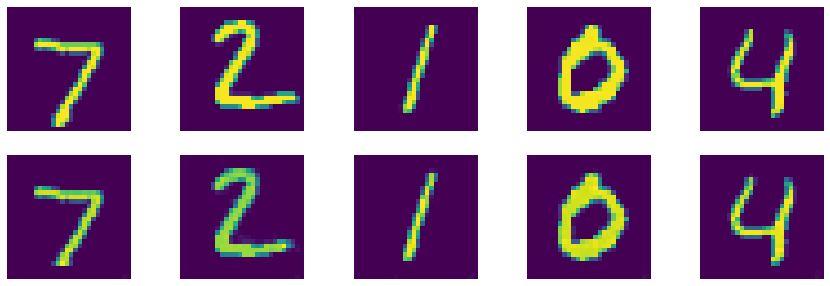

In [72]:
from matplotlib import pyplot as plt
import numpy as np
data = iter(testloader)
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    images, _ = next(data)
    images = images.to(device)
    ax = axes[0][i]
    ax.imshow(images[0][0].cpu())
    ax.axis('off')
    
    with tc.no_grad():
        reconstruct_images = auto_encoder(images)
    ax = axes[1][i]
    ax.imshow(reconstruct_images[0][0].cpu())
    ax.axis('off')
plt.show()

In [73]:
images, _ = next(iter(trainloader))
images = images.to(device)
vec = auto_encoder.encode(images)
vec.shape

torch.Size([32, 4, 20, 20])

In [74]:
tc.save(auto_encoder.state_dict(), '../AE_mnist20x20.pth')

In [47]:
# 16x16

In [43]:
import torch as tc
from torch import nn
from torch.nn import functional as F


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 6, 5)
        self.conv3 = nn.Conv2d(6, 4, 5)
        self.conv_transpose1 = nn.ConvTranspose2d(4, 6, 5)        
        self.conv_transpose2 = nn.ConvTranspose2d(6, 8, 5)
        self.conv_transpose3 = nn.ConvTranspose2d(8, 1, 5)
    
    def forward(self, x):
        x = self.encode(x)
        return self.decode(x)
        
    
    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        return x
    
    def decode(self, x):
        x = F.relu(self.conv_transpose1(x))
        x = F.relu(self.conv_transpose2(x))
        x = F.relu(self.conv_transpose3(x))
        return x

In [44]:
from torch import optim
device = tc.device('cuda:0')

auto_encoder = AutoEncoder()
auto_encoder.to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(auto_encoder.parameters(), lr=0.01)
for epoch in range(3):
    for images, label in trainloader:
        images = images.to(device)
        x = auto_encoder(images)
        optimizer.zero_grad()
        loss = loss_fn(x, images)
        loss.backward()
        optimizer.step()

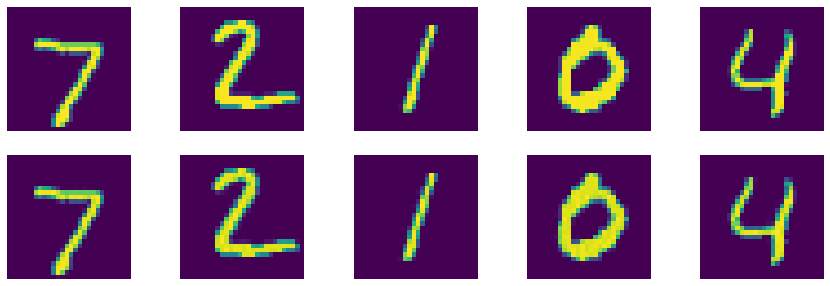

In [30]:
from matplotlib import pyplot as plt
import numpy as np
data = iter(testloader)
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    images, _ = next(data)
    images = images.to(device)
    ax = axes[0][i]
    ax.imshow(images[0][0].cpu())
    ax.axis('off')
    
    with tc.no_grad():
        reconstruct_images = auto_encoder(images)
    ax = axes[1][i]
    ax.imshow(reconstruct_images[0][0].cpu())
    ax.axis('off')
plt.show()

In [45]:
images, _ = next(iter(trainloader))
images = images.to(device)
vec = auto_encoder.encode(images)
vec.shape

torch.Size([4, 4, 16, 16])

In [46]:
tc.save(auto_encoder.state_dict(), '../AE_mnist16x16.pth')